In [1]:
from darksun import DarkSun
from haliax.dm_models import DarkSUN
from haliax.diffeq import ODESolution
import numpy as np
import matplotlib.pyplot as plt
import cProfile

In [2]:
n = 20
lamc = 1e-3

mod = DarkSun(n, lamc)
mod2 = DarkSUN(
    lamc,
    n,  
    1.0, 
    1.0,
    1.0, 
    1.0, 
    1.0, 
    1.0, 
    1e-2, 
    False
)

In [3]:
def computexi2(mod2, tsm):
    try: 
        return mod2.compute_xi(tsm) 
    except RuntimeError: 
        return np.nan

In [4]:
tsms = np.logspace(-7, -1, 100)
xis = [mod.compute_xi(tsm) for tsm in tsms]
xi2s = [computexi2(mod2, tsm) for tsm in tsms]

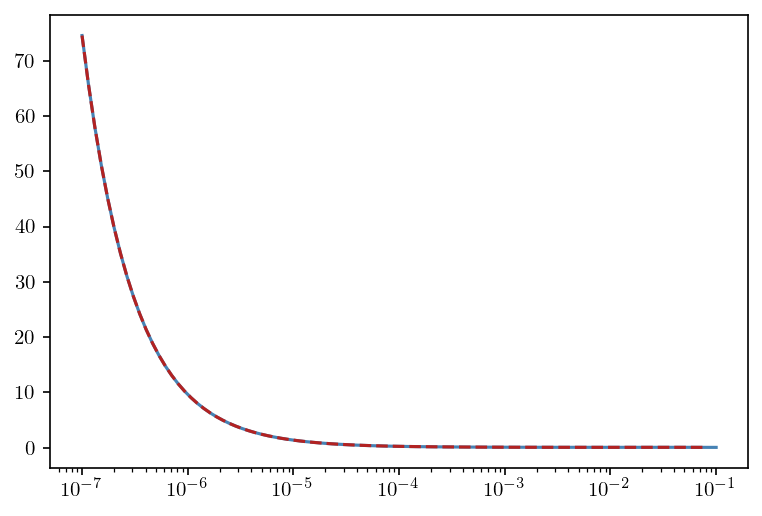

In [5]:
plt.figure(dpi=150)
plt.plot(tsms, xis)
plt.plot(tsms, xi2s, ls='--')
plt.xscale('log')

In [6]:
xs = np.logspace(-2, 2, 100)

In [7]:
tc1s = [mod.thermal_cross_section_2eta_4eta(x) for x in xs]

In [8]:
tc2s = [mod2.thermal_cross_section_2eta_4eta(x) for x in xs]

Text(0, 0.5, '$\\langle\\sigma v\\rangle_{2\\to4}$')

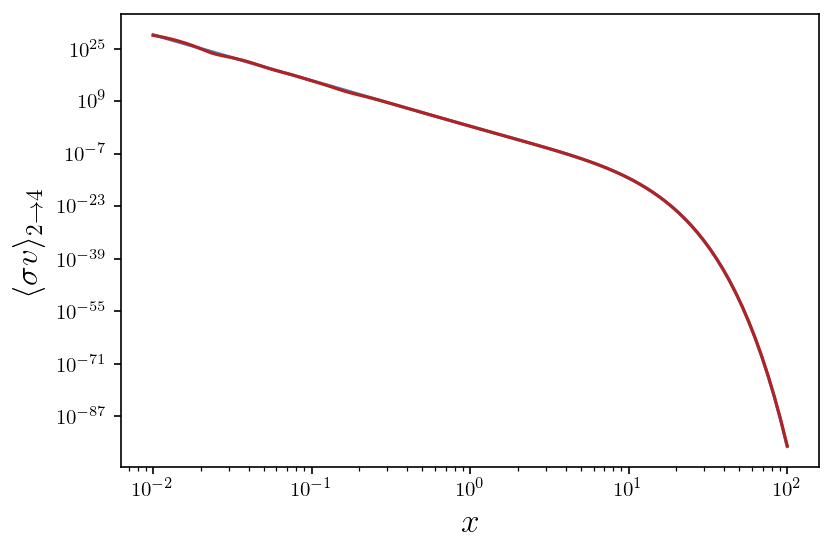

In [9]:
plt.figure(dpi=150)
plt.plot(xs, tc1s)
plt.plot(xs, tc2s)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\langle\sigma v\rangle_{2\to4}$',fontsize=16)

Text(0, 0.5, '$\\langle\\sigma v\\rangle_{4\\to2}$')

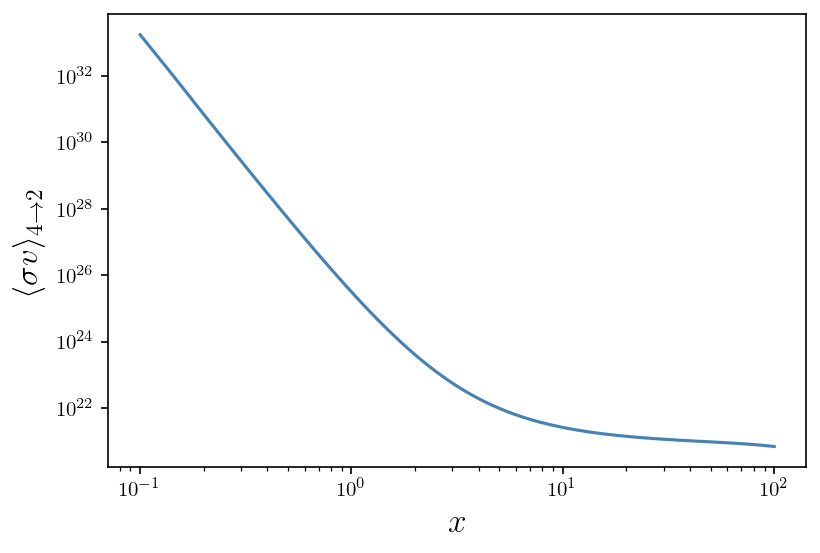

In [10]:
xs = np.logspace(-1, 2, 100)
tc42s = [mod.thermal_cross_section_4eta_2eta(x) for x in xs]

plt.figure(dpi=150)
plt.plot(xs, tc42s)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\langle\sigma v\rangle_{4\to2}$',fontsize=16)

In [11]:
from scipy.special import kn
def neq(x, model):
    T = model.m_eta / x
    return kn(2, x) * T**3 * x**2 / (2.0 * np.pi**2)

<ipython-input-12-9fabc2257c61>:3: RuntimeWarning: invalid value encountered in double_scalars
  tc24s = [mod.thermal_cross_section_2eta_4eta(x) / neq(x, mod)**2 for x in xs]


Text(0, 0.5, '$\\langle\\sigma v\\rangle_{4\\to2}$')

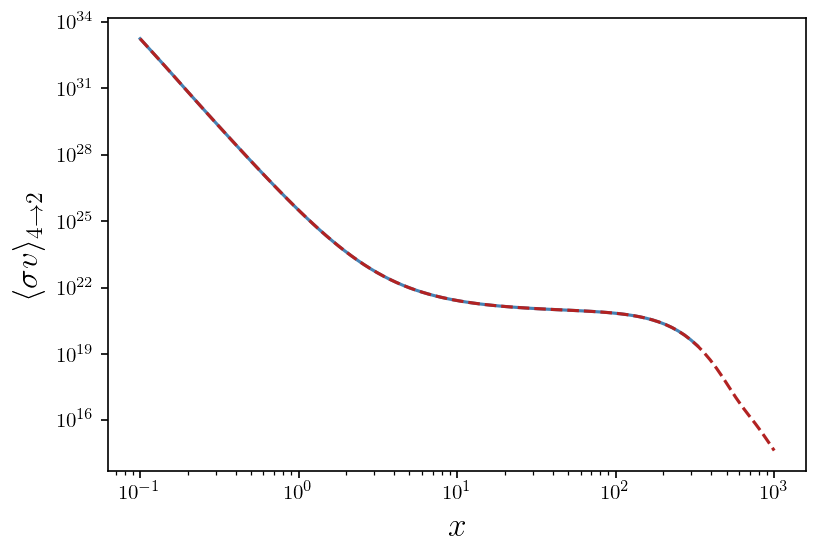

In [12]:
xs = np.logspace(-1, 3, 100)
tc42s = [mod.thermal_cross_section_4eta_2eta(x) for x in xs]
tc24s = [mod.thermal_cross_section_2eta_4eta(x) / neq(x, mod)**2 for x in xs]

plt.figure(dpi=150)
plt.plot(xs, tc24s)
plt.plot(xs, tc42s, '--')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\langle\sigma v\rangle_{4\to2}$',fontsize=16)

In [22]:
n = 6
lamc = 1e-3
mod = DarkSun(n, lamc)
mod2 = DarkSUN(
    lamc,
    n,  
    1.0, 
    1.0,
    1.0, 
    1.0, 
    1.0, 
    1.0, 
    1e-2, 
    False
)

In [23]:
sol = mod.solve_boltzmann()

RuntimeError: dx = 0.00000000000000475292047550767 less than dtmin.

In [24]:
mod2.solve_boltzmann()

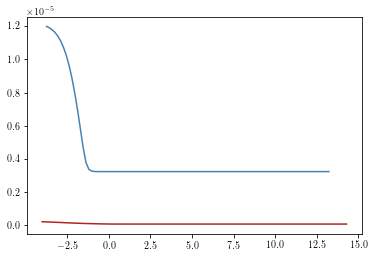

In [25]:
us = np.exp([sol[1][i][0] for i in range(len(sol[1]))])
us2 = [mod2.solution.u[i][0] for i in range(len(mod2.solution.u))]
plt.plot(sol[0], us)
plt.plot(mod2.solution.t, us2)

In [26]:
mod.m_eta

0.0004082482904638631

In [27]:
mod2.mu_eta * mod2.lam / np.sqrt(mod2.N)

0.0004082482904638631

In [28]:
mod2.Tsm_fo

0.0002208781395962991

In [29]:
mod2.solution.u

[array([2.08582893e-07, 6.99661648e-13]),
 array([2.08582780e-07, 1.70392013e-10]),
 array([2.08582449e-07, 9.52981942e-10]),
 array([2.08581617e-07, 7.21075616e-09]),
 array([2.08579519e-07, 2.64515079e-08]),
 array([2.08571829e-07, 8.53900708e-08]),
 array([2.08534722e-07, 3.67480562e-07]),
 array([2.08249965e-07, 2.14090071e-06]),
 array([2.07350717e-07, 5.10087972e-06]),
 array([2.06236229e-07, 6.44175914e-06]),
 array([2.05018801e-07, 6.95025163e-06]),
 array([2.03739258e-07, 7.13544186e-06]),
 array([2.02396239e-07, 7.20236970e-06]),
 array([2.00566469e-07, 7.22925506e-06]),
 array([1.98669282e-07, 7.23578281e-06]),
 array([1.96955109e-07, 7.23720359e-06]),
 array([1.95201083e-07, 7.23758005e-06]),
 array([1.92173862e-07, 7.23769490e-06]),
 array([1.90257514e-07, 7.23770380e-06]),
 array([1.88309321e-07, 7.23770570e-06]),
 array([1.85991356e-07, 7.23770612e-06]),
 array([1.83635769e-07, 7.23770618e-06]),
 array([1.81223813e-07, 7.23770618e-06]),
 array([1.78781265e-07, 7.23770618

In [30]:
mod2.xi_fo

0.16777088086066572

In [31]:
mod2.xi_bbn

0.06988092198077137